<a href="https://colab.research.google.com/github/yaminiakkala/Mental-Fitness-Tracker/blob/main/mentalFitnessTracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
#import all libraries
import pandas as pd   #data processing ,CSV I/O
import numpy as np    #linear algebra
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, BayesianRidge
# from sklearn.svm import SVR
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.metrics import mean_squared_error, r2_score
# from xgboost import XGBRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.neural_network import MLPRegressor

In [50]:
import seaborn as sns #seaborn in python data visulization library basesd on matplotlib
import matplotlib.pyplot as plt #matplotlib is a low level graph plotting library in python that serves as a visulization utility
import plotly.express as px #allows you to create interactive plots with very little code


In [51]:
#prevalence-by-mental-and-substance-use-disorder.csv
df1 = pd.read_csv('prevalence-by-mental-and-substance-use-disorder.csv')
#mental-and-substance-use-as-share-of-disease.csv
df2 = pd.read_csv('mental-and-substance-use-as-share-of-disease.csv')

In [ ]:
#prevalence-by-mental-and-substance-use-disorder.csv
df1.head()

In [ ]:
df2.head()

In [ ]:
#merging two datasets prevalence-by-mental-and-substance-use-disorder.csv &mental-and-substance-use-as-share-of-disease.csv
data = pd.merge(df1, df2)
data.head(10)

DATA CLEANING

In [ ]:
#filling missing values in dataset
data.isnull().sum()

In [56]:
#drop the column
data.drop('Code', axis=1, inplace=True)

In [ ]:
#view the data
data.head(10)

In [58]:
#size =row*column ,shape=tuple of array dimensions(row,col)
data.size,data.shape

(68400, (6840, 10))

In [20]:
#column set
data.set_axis(['Country','Year','Schizophrenia', 'Bipolar_disorder', 'Eating_disorder','Anxiety','drug_usage','depression','alcohol','mental_fitness'], axis='columns', inplace=True)

In [ ]:
data.head(10) #our target or dependent if mental_fitness


VISULIZATION

[]

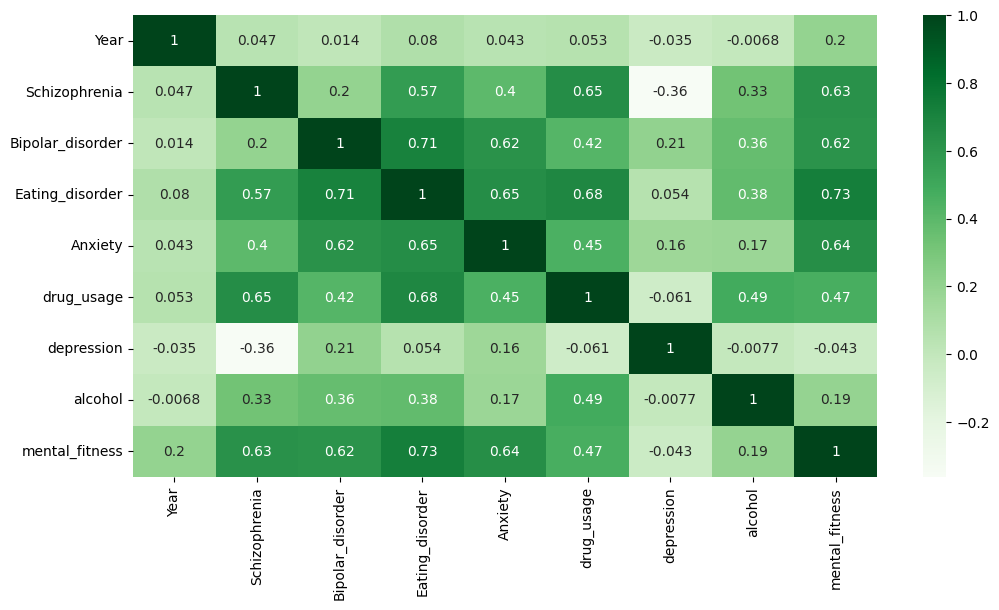

In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,cmap='Greens')  #heatmap is defined as graphical representation of data using colors for visual representation of matrix
plt.plot()

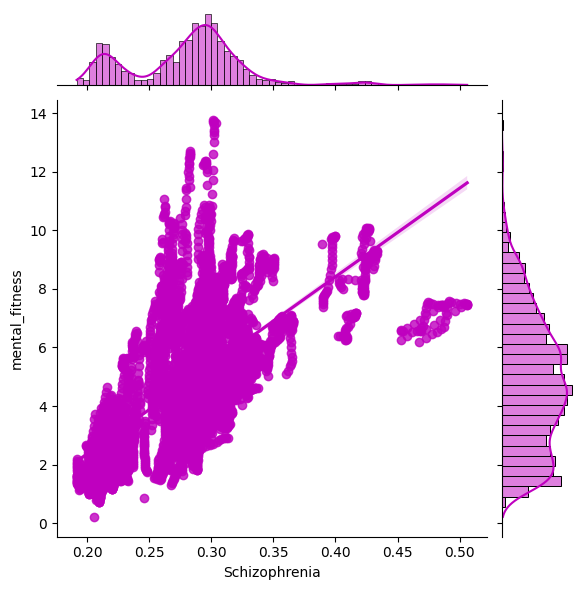

In [24]:
sns.jointplot(data,x="Schizophrenia",y="mental_fitness",kind="reg",color="m")
plt.show()

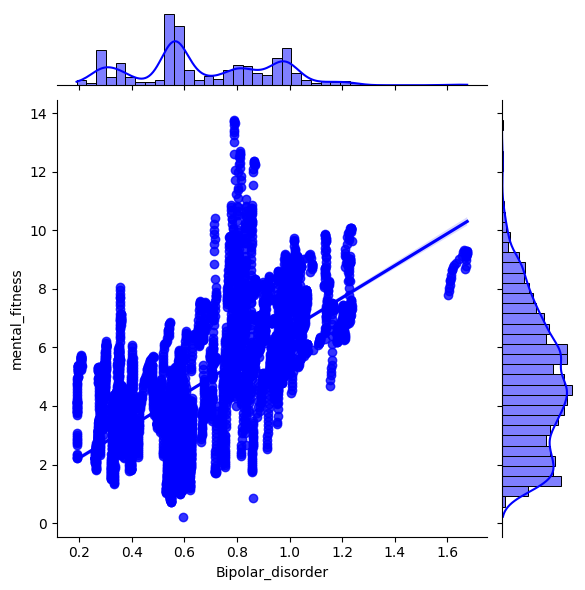

In [25]:
sns.jointplot(data,x='Bipolar_disorder',y='mental_fitness',kind='reg',color='blue')
plt.show()

In [ ]:
sns.pairplot(data,corner=True)  #paiwise relation ships in a dataset
plt.show()

In [27]:
mean = data['mental_fitness'].mean()
mean

4.8180618117506135

In [28]:

fig = px.pie(data, values='mental_fitness', names='Year')
fig.show()

In [29]:
fig=px.bar(data.head(10),x='Year',y='mental_fitness',color='Year',template='ggplot2')
fig.show()

In [30]:
fig = px.line(data, x="Year", y="mental_fitness", color='Country',markers=True,color_discrete_sequence=['red','blue'],template='plotly_dark')
fig.show()

In [31]:
df=data.copy()
df.head()

,Country,Year,Schizophrenia,Bipolar_disorder,Eating_disorder,Anxiety,drug_usage,depression,alcohol,mental_fitness
0,Afghanistan,1990,0.228979,0.721207,0.131001,4.835127,0.454202,5.125291,0.444036,1.696670
1,Afghanistan,1991,0.228120,0.719952,0.126395,4.821765,0.447112,5.116306,0.444250,1.734281
2,Afghanistan,1992,0.227328,0.718418,0.121832,4.801434,0.441190,5.106558,0.445501,1.791189
3,Afghanistan,1993,0.226468,0.717452,0.117942,4.789363,0.435581,5.100328,0.445958,1.776779
4,Afghanistan,1994,0.225567,0.717012,0.114547,4.784923,0.431822,5.099424,0.445779,1.712986


In [32]:
#information about the data
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6840 entries, 0 to 6839
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           6840 non-null   object 
 1   Year              6840 non-null   int64  
 2   Schizophrenia     6840 non-null   float64
 3   Bipolar_disorder  6840 non-null   float64
 4   Eating_disorder   6840 non-null   float64
 5   Anxiety           6840 non-null   float64
 6   drug_usage        6840 non-null   float64
 7   depression        6840 non-null   float64
 8   alcohol           6840 non-null   float64
 9   mental_fitness    6840 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 587.8+ KB


In [34]:
#transform non-numeric labels to numeric labeles
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object': #transform non-numerical labels (as long as they are hashable and comparable) to numeric labels
        df[i]=l.fit_transform(df[i])



In [36]:
df.shape

(6840, 10)

SPLIT DATA-training Data,Splitting Data

In [38]:
X = df.drop('mental_fitness',axis=1)
y = df['mental_fitness']
from sklearn.model_selection import train_test_split   #used to split the data into training data and testing data
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2)
#random_state simply set seeds to the random generator,so that your train test splits are always deterministic,if you don't set seed it will different each time

In [40]:
#tainning(6840,10)
#6840*80/100=5472
#6840*20/100=1368
print("xtrain: ", xtrain.shape)
print("xtest: ", xtest.shape)
print("ytrain: ", ytrain.shape)
print("ytest: ", ytest.shape)

xtrain:  (5472, 9)
xtest:  (1368, 9)
ytrain:  (5472,)
ytest:  (1368,)


Model Training   
1. linear regression
2.random foresr

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression()
lr.fit(xtrain,ytrain)   #fit trainng data

# model evaluation for training set
ytrain_pred = lr.predict(xtrain)
#the mean square error is the average of the square of the difference between observed and predicted value of a variable
mse = mean_squared_error(ytrain, ytrain_pred)   #observed value and predicted value
#root mean square error measures the average difference between values predicted by model and actua values
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
#the coefficent of determination or R2,is a measure that priovides information about the goodness of fit of a model.In the context of regression it is a statistical measure oif
r2 = r2_score(ytrain, ytrain_pred)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")



The model performance for training set
--------------------------------------
MSE is 1.389959372405798
RMSE is 1.1789653821914357
R2 score is 0.7413245790025275




In [45]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)

# model evaluation for training set
ytrain_pred = rf.predict(xtrain)
mse = mean_squared_error(ytrain, ytrain_pred)
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")



The model performance for training set
--------------------------------------
MSE is 0.004822766592046057
RMSE is 0.06944614166421384
R2 score is 0.9991024693215236




EVALUATION

In [47]:
#linear regression model evaluation for testing set
ytest_pred = lr.predict(xtest)  # (unseen data)
mse = mean_squared_error(ytest, ytest_pred)
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)

print("linear regression model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
# random forest model evaluation for testing set
ytest_pred = rf.predict(xtest)   # (unseen data)
mse = mean_squared_error(ytest, ytest_pred)
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)

print(" random forest model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

linear regression model performance for testing set
--------------------------------------
MSE is 1.1357545319272384
RMSE is 1.0657178481789813
R2 score is 0.7638974087055272
 random forest model performance for testing set
--------------------------------------
MSE is 0.03051924941708906
RMSE is 0.17469759419376404
R2 score is 0.9936556063223363
